# (a)

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math as mt
from scipy.stats import gaussian_kde
from numpy import random
from tabulate import tabulate

In [2]:
#density probability function
def f(x):
    return 0.5*np.exp(-np.abs(x))
    

First coding the process of generating a single value of a sample step by step, before then creating a function to generate a full sample.

In [3]:
#creating a random walk metropolis
#setting variable of x0 = 1
s = 1
current_value = 0
sample = []
#generating x*, which is the random number we will get from normal distribution with mean=x0 and sd = s = 1
xstar = np.random.normal(loc = current_value, scale = s, size = 1)[0]
#since the np.random.normal gives us an array (which in this case is size 1) so we must use indexing to pick the specific value required

#Now computing the ratio
r = f(xstar)/f(current_value)

#Now generating random number u from uniform distribution between 0 and 1
u = np.random.uniform(low = 0.0, high = 1.0, size = 1)

#Now checking if u<r and reassigning xi
if mt.log(u)<mt.log(r):
    sample.append(xstar)
else:
    xstar = current_value


In [4]:
#Now creating a loop to run the random walk metropolis N times and gather the samples


def random_walk_metropolis(N,s):
    current_value = 0
    sample = []
    i = 0
    while i < N:
        
        xstar = np.random.normal(loc = current_value, scale = s, size = 1)[0]

        r = f(xstar)/f(current_value)

        u = np.random.uniform(low = 0.0, high = 1.0, size = 1)

        if mt.log(u)<mt.log(r):
            sample.append(xstar)
            current_value = xstar
            i = i + 1
        else:
            pass
        
    
    return sample

In [6]:
#Computing the mean and standard deviation of the sample
sample_mean = sum(sample)/len(sample)
sample_standard_deviation = np.std(sample)
print('Monte Carlo Estimate of Mean: ', sample_mean)
print('Monte Carlo Estimate of Standard Deviation:', sample_standard_deviation)

Monte Carlo Estimate of Mean:  -0.07399652933393422
Monte Carlo Estimate of Standard Deviation: 1.4604675749490719


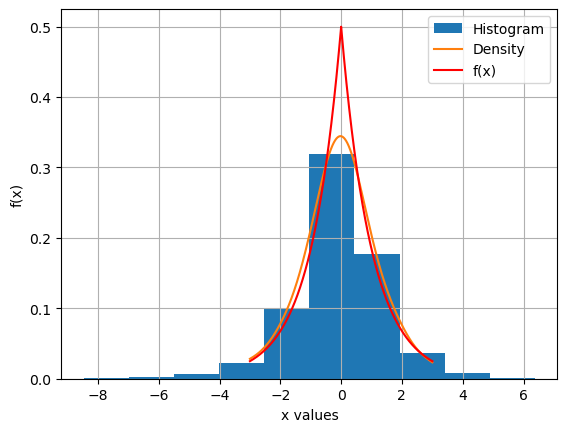

In [7]:
plt.hist(sample, density=True, histtype='bar', label='Histogram')

# Plotting density curve
density = gaussian_kde(sample)
x = np.linspace(-3, 3, 5000)
density.covariance_factor = lambda: .25
density._compute_covariance()
plt.plot(x, density(x), label='Density')


y = f(x)
plt.plot(x, y, color='red', label='f(x)')

plt.xlabel('x values')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

plt.show()

# (b)

Firstly generating the R hat value for N = 2000, s = 0.001 and J = 4 cell by cell.

Note that J refers to the number of samples, so in this case it will be 4 samples

Afterwards everything is put together into one fuction using for and while loops, to create a function that gives Rhat values for a range of s values as specified by the function argument.


In [8]:
#Defining a function to generate samples, where we can alter the starting x0 value but replacing N with 2000 and s with 0.001

N1 = 2000
s1 = 0.001

def random_walk_metropolis_generator(starting_value):
    i = 0
    current_value = starting_value
    sample_s = []
    while i < N1:
        
        xstar = np.random.normal(loc = current_value, scale = s1, size = 1)[0]

        r = f(xstar)/f(current_value)

        u = np.random.uniform(low = 0.0, high = 1.0, size = 1)

        if mt.log(u)<mt.log(r):
            sample_s.append(xstar)
            i = i + 1
            current_value = xstar
        else:
            pass
    
    return sample_s 

In [9]:
#Now generating 4 samples (since J=4) using different initial values
j1 = random_walk_metropolis_generator(random.randint(100,120))
j2 = random_walk_metropolis_generator(random.randint(100,120))
j3 = random_walk_metropolis_generator(random.randint(100,120))
j4 = random_walk_metropolis_generator(random.randint(100,120))
#Note that the range of values for the random generator was picked randomly between 100 and 120 to avoid any values close to 0, since that would cause a possible error when computing r

In [10]:
#Now creating function to compute sample mean of each chain
def Mean(chain): 
    return sum(chain) / len(chain) 

In [11]:
#Obtaining our mean values for each chain
print(Mean(j1), Mean(j2), Mean(j3), Mean(j4))
Mj = [Mean(j1), Mean(j2), Mean(j3), Mean(j4)]

118.94769464310912 115.97562196256162 102.03840409309929 112.00864741729046


In [12]:
#Now creating function to compute sample variance of each chain

def Variance(chain):
    
    mean = sum(chain)/len(chain)
    y = 0
    for x in chain:
        z = (x-mean)**2
        y = y + z
        
    return y/len(chain)


In [13]:
#Obtaining our variance values for each chain
print(Variance(j1), Variance(j2), Variance(j3), Variance(j4))

0.000931280425616569 0.0006238567927906406 0.0002200521246825083 0.0003616583458796755


In [14]:
#Placing variance values in list to compute within sample variance
Vj = [Variance(j1), Variance(j2), Variance(j3), Variance(j4)]
Vj

[0.000931280425616569,
 0.0006238567927906406,
 0.0002200521246825083,
 0.0003616583458796755]

In [15]:
#Creating function for overall within sample variance W
def Within_Variance(chain):
    
    return sum(chain)/len(chain)


In [16]:
#Computing within variance
W = Within_Variance(Vj)
W

0.0005342119222423484

In [17]:
#Creating function for overall sample mean M
def Overall_mean(chain):
           
    return sum(chain)/len(chain) 

In [18]:
#Computing overall sample mean M
M = Overall_mean(Mj)
M

112.24259202901513

In [19]:
#Creating function for between sample variance B
def Between_Variance(chain):
    y = 0
    for number in chain:
        z = (number - M)**2
        y = y + z
    
    return y/len(chain)

In [20]:
#Computing between sample variance B
B = Between_Variance(Mj)
B

40.76852376578238

In [21]:
#Computing R hat value

R = ((B+W)/W)**0.5
R

276.25398420688356

Hence the Rhat has been computed.

Now building up the function to generate Rhat values for a range of s values.

In [22]:
#creating a function that allows specifying no. of samples, size of sample, standard deviation and R hat values all in one
def Rhat_diagnostic_generator(N,s,J):
    
    lists = []
    within_sample_variances = []
    sample_means = []
    
    for k in range(J):
        
        i = 0
        
        starting_value = random.randint(100,120)
        sample_s = []
        
        while i < N:
            
            
            xstar = np.random.normal(loc = starting_value, scale = s, size = 1)[0]

            r = f(xstar)/f((starting_value))

            u = np.random.uniform(low = 0.0, high = 1.0, size = 1)

            if mt.log(u)<mt.log(r):
                sample_s.append(xstar)
                i = i + 1
                starting_value = xstar
            else:
                pass
    
        lists.append(sample_s)
        
        
        # Calculate mean
        sample_mean = np.mean(sample_s)
        sample_means.append(sample_mean)
        
        # Calculate sample within variance
        within_sample_variance = np.sum((np.array(sample_s) - sample_mean)**2) / N
        within_sample_variances.append(within_sample_variance)
    
    W = np.mean(within_sample_variances)
    M = np.mean(sample_means)
    
    B = np.sum((np.array(sample_means) - M)**2) / J
    
    Rhat = ((B+W)/W)**0.5
    
    return Rhat
   
   


In [23]:
Rhat_diagnostic_generator(2000,0.001,4)

208.12957843894876

Finally putting everything together to create a function that generates Rhat values for a range of standard deviation values as specified by the function arguments.


In [24]:
def Rhat_for_s_values_generator(N,s_start,s_end,s_step,J):
    
    num_steps = int((s_end - s_start) / s_step) + 1
    #Note that we add 1 because we also need to account for the 0 step; that is, take s as its initial value without any added step value
    #In this scenario, we would need to consider Rhat for s=0.001, where s_step value would need to be 0. 
    Rhats = []
    
    for step_num in range(num_steps):
        s = s_start + (step_num * s_step)
        lists = []
        within_sample_variances = []
        sample_means = []
    
        for k in range(J):
        
            i = 0
            starting_value = random.randint(100,120)
            sample_s = []
        
            while i < N:
            
            
                xstar = np.random.normal(loc = starting_value, scale = s, size = 1)[0]

                r = f(xstar)/f(starting_value)

                u = np.random.uniform(low = 0.0, high = 1.0, size = 1)

                if mt.log(u)<mt.log(r):
                    sample_s.append(xstar)
                    i = i + 1
                    starting_value = xstar
                else:
                    pass
    
            lists.append(sample_s)
        
            sample_mean = np.mean(sample_s)
            sample_means.append(sample_mean)
        
            within_sample_variance = np.sum((np.array(sample_s) - sample_mean)**2) / N
            within_sample_variances.append(within_sample_variance)
    
        W = np.mean(within_sample_variances)
        M = np.mean(sample_means)
        B = np.sum((np.array(sample_means) - M)**2) / J
    
        Rhat = ((B+W)/W)**0.5
        Rhats.append([s,Rhat])
    
    print(tabulate(Rhats, headers=['s', 'Rhat'], tablefmt='grid'))
    return Rhats
   

In [25]:
result = Rhat_for_s_values_generator(2000,0.001,1,0.013875,4)

+----------+-----------+
|        s |      Rhat |
+==========+===========+
| 0.001    | 327.301   |
+----------+-----------+
| 0.014875 |  15.1596  |
+----------+-----------+
| 0.02875  |  15.6944  |
+----------+-----------+
| 0.042625 |   6.38796 |
+----------+-----------+
| 0.0565   |   6.36307 |
+----------+-----------+
| 0.070375 |   2.57154 |
+----------+-----------+
| 0.08425  |   2.21518 |
+----------+-----------+
| 0.098125 |   1.90945 |
+----------+-----------+
| 0.112    |   1.96525 |
+----------+-----------+
| 0.125875 |   1.87819 |
+----------+-----------+
| 0.13975  |   1.17782 |
+----------+-----------+
| 0.153625 |   1.35683 |
+----------+-----------+
| 0.1675   |   1.21636 |
+----------+-----------+
| 0.181375 |   1.49123 |
+----------+-----------+
| 0.19525  |   1.14796 |
+----------+-----------+
| 0.209125 |   1.05387 |
+----------+-----------+
| 0.223    |   1.03329 |
+----------+-----------+
| 0.236875 |   1.31703 |
+----------+-----------+
| 0.25075  |   1.12492 |


In [26]:
#Extracting values for plotting graph
s_values = [entry[0] for entry in result]
Rhat_values = [entry[1] for entry in result]


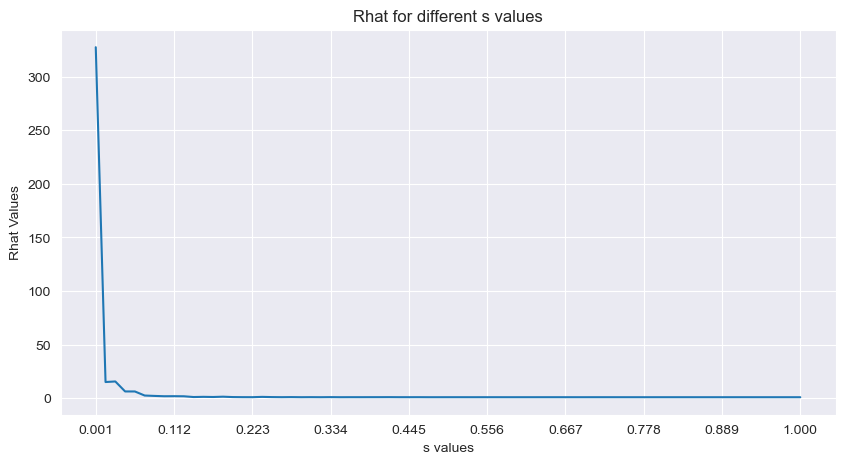

In [27]:
#Plotting the graph
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 5))
ax.set(xlabel="s values", ylabel="Rhat Values")
#Plotting the line graph
sns.lineplot(ax=ax, x=s_values, y=Rhat_values)
ax.set_xticks(np.arange(0.001, 1.001, 0.111))
ax.set_title("Rhat for different s values")

plt.show()